In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('cleaned_car (9).csv')

# Inspect the first few rows
print(data.head())

# Check the structure of the dataset
print(data.info())

  registration_date    year  price_in_euro  power_kw  power_ps  \
0        2023-05-01  2023.0        38490.0  0.069154  0.233622   
1        2018-09-01  2018.0        11555.0  0.023881  0.081582   
2        2021-05-01  2021.0        48886.0  0.061692  0.208900   
3        2018-07-01  2018.0        24490.0  0.056219  0.190358   
4        2023-02-01  2023.0        34990.0  0.054229  0.184178   

   fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  \
0                  0.002669               0.061295       0.000026   
1                  0.002274               0.052397       0.007311   
2                  0.002867               0.000000       0.001118   
3                  0.003707               0.086505       0.015000   
4                  0.002916               0.074147       0.001974   

   registration_month  car_age  ...  fuel_type_diesel hybrid  \
0                   5        2  ...                        0   
1                   9        7  ...                        0

# What the model learns from:
- Technical specs: power_kw, fuel_consumption, mileage_in_km
- Age factors: car_age, registration_year  
- Economic factors: price_in_euro
- Performance metrics: power_ps, fuel_consumption_g_km

In [20]:
# Check for missing values
print(data.isnull().sum())

registration_date    0
year                 0
price_in_euro        0
power_kw             0
power_ps             0
                    ..
fuel_type_lpg        0
fuel_type_manual     0
fuel_type_other      0
fuel_type_petrol     0
fuel_type_unknown    0
Length: 77, dtype: int64


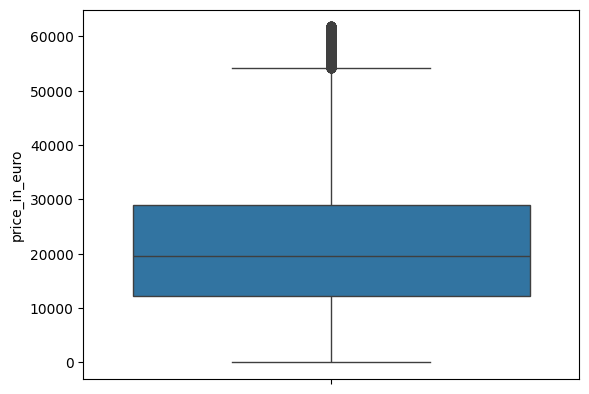

In [21]:
# Plot distributions to check for outliers
sns.boxplot(data['price_in_euro'])
plt.show()


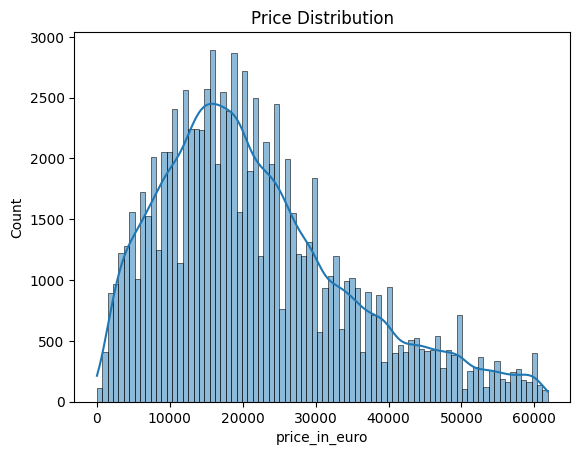

In [22]:
sns.histplot(data['price_in_euro'], kde=True)
plt.title('Price Distribution')
plt.show()


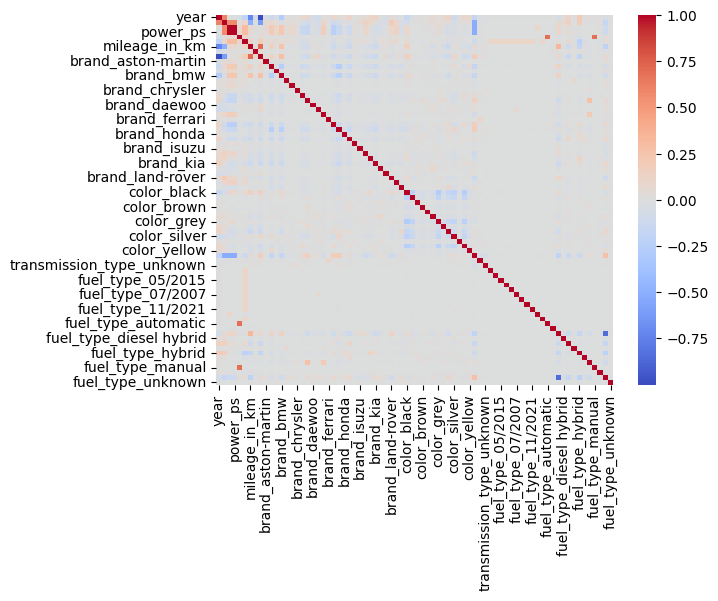

In [23]:
correlation_matrix = data.drop('registration_date', axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [24]:
# SIMPLE X-y SEPARATION
target_column = 'price_in_euro'  # Target column: price_in_euro
X = data.drop(columns=[target_column])  # Features: all columns except price_in_euro
y = data[target_column]  # Target variable: price_in_euro

In [25]:
print(f"Features: {X.shape}, Target: {y.shape}")

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Features: (93243, 76), Target: (93243,)
Train set: (74594, 76), Test set: (18649, 76)


In [26]:
# Step 4: Initialize Models
print("\nStep 4: Initializing models...")
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}
print("✓ Models initialized successfully")


Step 4: Initializing models...
✓ Models initialized successfully


In [27]:
print("\nStep 5: Training and evaluating models...")
results = {}

# Drop the non-numeric 'registration_date' column
X_train_numeric = X_train.drop(columns=['registration_date'])
X_test_numeric = X_test.drop(columns=['registration_date'])

# Create imputer using training data statistics
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)


Step 5: Training and evaluating models...



# **1. TRAINING: LINEAR REGRESSION**

In [30]:
model_lr = models['Linear Regression']
print("✓ Starting training...")
model_lr.fit(X_train_imputed, y_train)
print("✓ Training completed")

# Predictions
y_pred_lr = model_lr.predict(X_test_imputed)

# Calculate metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Store results
results['Linear Regression'] = {
    'MAE': mae_lr, 'MSE': mse_lr, 'RMSE': rmse_lr, 'R2': r2_lr, 'model': model_lr
}

print("✓ PERFORMANCE METRICS:")
print(f"  R² Score:  {r2_lr:.4f}")
print(f"  RMSE:      {rmse_lr:.2f}")
print(f"  MAE:       {mae_lr:.2f}")
print(f"  MSE:       {mse_lr:.2f}")

✓ Starting training...
✓ Training completed
✓ PERFORMANCE METRICS:
  R² Score:  0.4785
  RMSE:      9520.78
  MAE:       4167.91
  MSE:       90645169.06


# **2. RIDGE REGRESSION**

In [31]:
model_ridge = models['Ridge Regression']
print("✓ Starting training...")
model_ridge.fit(X_train_imputed, y_train)
print("✓ Training completed")

# Predictions
y_pred_ridge = model_ridge.predict(X_test_imputed)

# Calculate metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Store results
results['Ridge Regression'] = {
    'MAE': mae_ridge, 'MSE': mse_ridge, 'RMSE': rmse_ridge, 'R2': r2_ridge, 'model': model_ridge
}

print("✓ PERFORMANCE METRICS:")
print(f"  R² Score:  {r2_ridge:.4f}")
print(f"  RMSE:      {rmse_ridge:.2f}")
print(f"  MAE:       {mae_ridge:.2f}")
print(f"  MSE:       {mse_ridge:.2f}")

✓ Starting training...
✓ Training completed
✓ PERFORMANCE METRICS:
  R² Score:  0.7913
  RMSE:      6022.62
  MAE:       4154.94
  MSE:       36271903.46


# **3. LASSO REGRESSION**

In [32]:
model_lasso = models['Lasso Regression']
print("✓ Starting training...")
model_lasso.fit(X_train_imputed, y_train)
print("✓ Training completed")

# Predictions
y_pred_lasso = model_lasso.predict(X_test_imputed)

# Calculate metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Store results
results['Lasso Regression'] = {
    'MAE': mae_lasso, 'MSE': mse_lasso, 'RMSE': rmse_lasso, 'R2': r2_lasso, 'model': model_lasso
}

print("✓ PERFORMANCE METRICS:")
print(f"  R² Score:  {r2_lasso:.4f}")
print(f"  RMSE:      {rmse_lasso:.2f}")
print(f"  MAE:       {mae_lasso:.2f}")
print(f"  MSE:       {mse_lasso:.2f}")

✓ Starting training...
✓ Training completed
✓ PERFORMANCE METRICS:
  R² Score:  0.7891
  RMSE:      6055.00
  MAE:       4158.34
  MSE:       36662997.93


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+12, tolerance: 1.272e+09
  model = cd_fast.enet_coordinate_descent(


# **4. RANDOM FOREST REGRESSOR**

In [33]:
model_rf = models['Random Forest']
print("✓ Starting training... (this may take a moment)")
model_rf.fit(X_train_imputed, y_train)
print("✓ Training completed")

# Predictions
y_pred_rf = model_rf.predict(X_test_imputed)

# Calculate metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Store results
results['Random Forest'] = {
    'MAE': mae_rf, 'MSE': mse_rf, 'RMSE': rmse_rf, 'R2': r2_rf, 'model': model_rf
}

print("✓ PERFORMANCE METRICS:")
print(f"  R² Score:  {r2_rf:.4f}")
print(f"  RMSE:      {rmse_rf:.2f}")
print(f"  MAE:       {mae_rf:.2f}")
print(f"  MSE:       {mse_rf:.2f}")


✓ Starting training... (this may take a moment)
✓ Training completed
✓ PERFORMANCE METRICS:
  R² Score:  0.8975
  RMSE:      4220.81
  MAE:       2602.66
  MSE:       17815217.07


# **5. GRADIENT BOOSTING REGRESSOR**

In [34]:
model_gb = models['Gradient Boosting']
print("✓ Starting training... (this may take a moment)")
model_gb.fit(X_train_imputed, y_train)
print("✓ Training completed")

# Predictions
y_pred_gb = model_gb.predict(X_test_imputed)

# Calculate metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Store results
results['Gradient Boosting'] = {
    'MAE': mae_gb, 'MSE': mse_gb, 'RMSE': rmse_gb, 'R2': r2_gb, 'model': model_gb
}

print("✓ PERFORMANCE METRICS:")
print(f"  R² Score:  {r2_gb:.4f}")
print(f"  RMSE:      {rmse_gb:.2f}")
print(f"  MAE:       {mae_gb:.2f}")
print(f"  MSE:       {mse_gb:.2f}")

✓ Starting training... (this may take a moment)
✓ Training completed
✓ PERFORMANCE METRICS:
  R² Score:  0.8698
  RMSE:      4757.48
  MAE:       3192.80
  MSE:       22633583.55


# **6. SUPPORT VECTOR REGRESSION**

In [ ]:
model_svr = models['Support Vector Regression']
print("✓ Starting training... (this may take a moment)")
model_svr.fit(X_train_imputed, y_train)
print("✓ Training completed")

# Predictions
y_pred_svr = model_svr.predict(X_test_imputed)

# Calculate metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Store results
results['Support Vector Regression'] = {
    'MAE': mae_svr, 'MSE': mse_svr, 'RMSE': rmse_svr, 'R2': r2_svr, 'model': model_svr
}

print("✓ PERFORMANCE METRICS:")
print(f"  R² Score:  {r2_svr:.4f}")
print(f"  RMSE:      {rmse_svr:.2f}")
print(f"  MAE:       {mae_svr:.2f}")
print(f"  MSE:       {mse_svr:.2f}")

✓ Starting training... (this may take a moment)


# **FINAL MODEL COMPARISON**

In [ ]:
print("\n📊 MODEL PERFORMANCE SUMMARY:")
print("-" * 70)
print(f"{'Model':<25} {'R² Score':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 70)

for name, result in results.items():
    print(f"{name:<25} {result['R2']:<10.4f} {result['RMSE']:<10.2f} {result['MAE']:<10.2f}")

# Identify best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_r2 = results[best_model_name]['R2']

print("\n" + "🎯 " + "="*50)
print(f"🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"🏆 BEST R² SCORE: {best_r2:.4f}")
print("="*50)

print("\n✓ All models trained and evaluated successfully!")

In [ ]:
# Step 6: Display Results in a DataFrame
print("\nStep 6: Results Summary")
results_df = pd.DataFrame({
    model: [results[model]['R2'], results[model]['RMSE'], results[model]['MAE']]
    for model in results
}, index=['R² Score', 'RMSE', 'MAE']).T

results_df = results_df.sort_values('R² Score', ascending=False)
print(results_df.round(4))

In [ ]:
# Step 7: Visualize Results
print("\nStep 7: Creating visualizations...")

# Plot 1: Model Comparison
plt.figure(figsize=(15, 5))

# R² Scores
plt.subplot(1, 3, 1)
r2_scores = [results[model]['R2'] for model in results_df.index]
plt.bar(results_df.index, r2_scores, color='skyblue')
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

# RMSE Comparison
plt.subplot(1, 3, 2)
rmse_scores = [results[model]['RMSE'] for model in results_df.index]
plt.bar(results_df.index, rmse_scores, color='lightcoral')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# MAE Comparison
plt.subplot(1, 3, 3)
mae_scores = [results[model]['MAE'] for model in results_df.index]
plt.bar(results_df.index, mae_scores, color='lightgreen')
plt.title('MAE Comparison')
plt.xticks(rotation=45)
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


In [17]:
# print("\nStep 5: Training and evaluating models...")
# results = {}

# # Drop the non-numeric 'registration_date' column
# X_train_numeric = X_train.drop(columns=['registration_date'])
# X_test_numeric = X_test.drop(columns=['registration_date'])

# # Create imputer using training data statistics
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train_numeric)
# X_test_imputed = imputer.transform(X_test_numeric)

# for name, model in models.items():
#     print(f"Training {name}...")

#     # Train model
#     model.fit(X_train_imputed, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test_imputed)

#     # Calculate metrics
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)

#     # Store results
#     results[name] = {
#         'MAE': mae,
#         'MSE': mse,
#         'RMSE': rmse,
#         'R2': r2,
#         'model': model
#     }

#     print(f"  {name} - R²: {r2:.4f}, RMSE: {rmse:.2f}")


Step 5: Training and evaluating models...
Training Linear Regression...
  Linear Regression - R²: 0.4785, RMSE: 9520.78
Training Ridge Regression...
  Ridge Regression - R²: 0.7913, RMSE: 6022.62
Training Lasso Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+12, tolerance: 1.272e+09
  model = cd_fast.enet_coordinate_descent(


  Lasso Regression - R²: 0.7891, RMSE: 6055.00
Training Random Forest...
  Random Forest - R²: 0.8975, RMSE: 4220.81
Training Gradient Boosting...
  Gradient Boosting - R²: 0.8698, RMSE: 4757.48
Training Support Vector Regression...
  Support Vector Regression - R²: -0.0352, RMSE: 13414.39


In [ ]:
# # Step 6: Display Results in a DataFrame
# print("\nStep 6: Results Summary")
# results_df = pd.DataFrame({
#     model: [results[model]['R2'], results[model]['RMSE'], results[model]['MAE']]
#     for model in results
# }, index=['R² Score', 'RMSE', 'MAE']).T

# results_df = results_df.sort_values('R² Score', ascending=False)
# print(results_df.round(4))


Step 7: Creating visualizations...


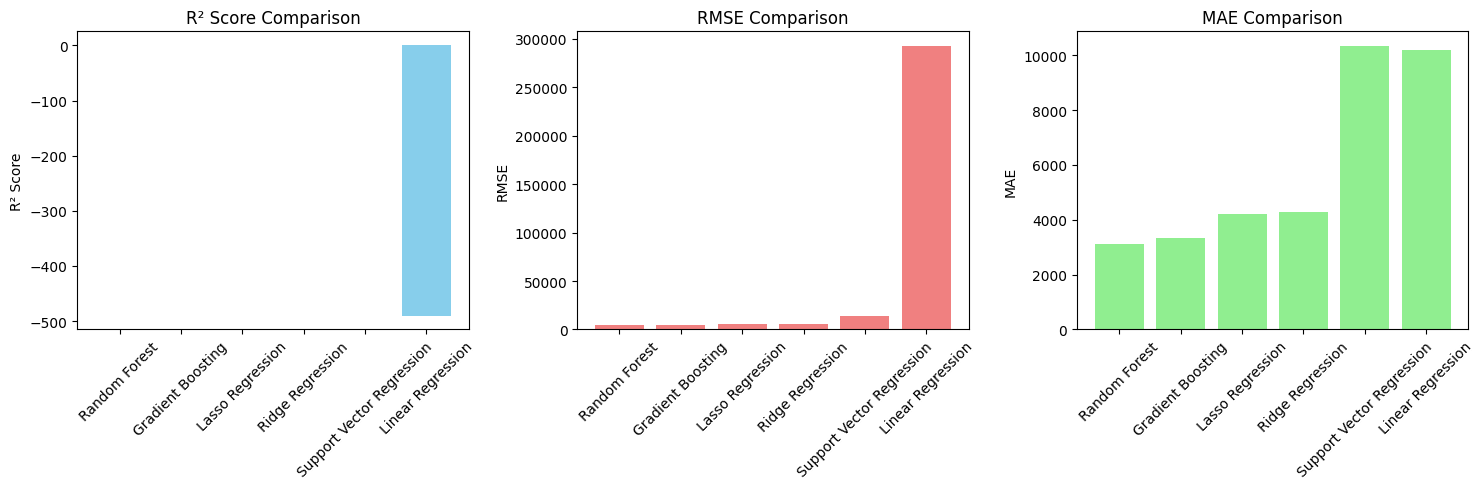

In [ ]:
# # Step 7: Visualize Results
# print("\nStep 7: Creating visualizations...")

# # Plot 1: Model Comparison
# plt.figure(figsize=(15, 5))

# # R² Scores
# plt.subplot(1, 3, 1)
# r2_scores = [results[model]['R2'] for model in results_df.index]
# plt.bar(results_df.index, r2_scores, color='skyblue')
# plt.title('R² Score Comparison')
# plt.xticks(rotation=45)
# plt.ylabel('R² Score')

# # RMSE Comparison
# plt.subplot(1, 3, 2)
# rmse_scores = [results[model]['RMSE'] for model in results_df.index]
# plt.bar(results_df.index, rmse_scores, color='lightcoral')
# plt.title('RMSE Comparison')
# plt.xticks(rotation=45)
# plt.ylabel('RMSE')

# # MAE Comparison
# plt.subplot(1, 3, 3)
# mae_scores = [results[model]['MAE'] for model in results_df.index]
# plt.bar(results_df.index, mae_scores, color='lightgreen')
# plt.title('MAE Comparison')
# plt.xticks(rotation=45)
# plt.ylabel('MAE')

# plt.tight_layout()
# plt.show()


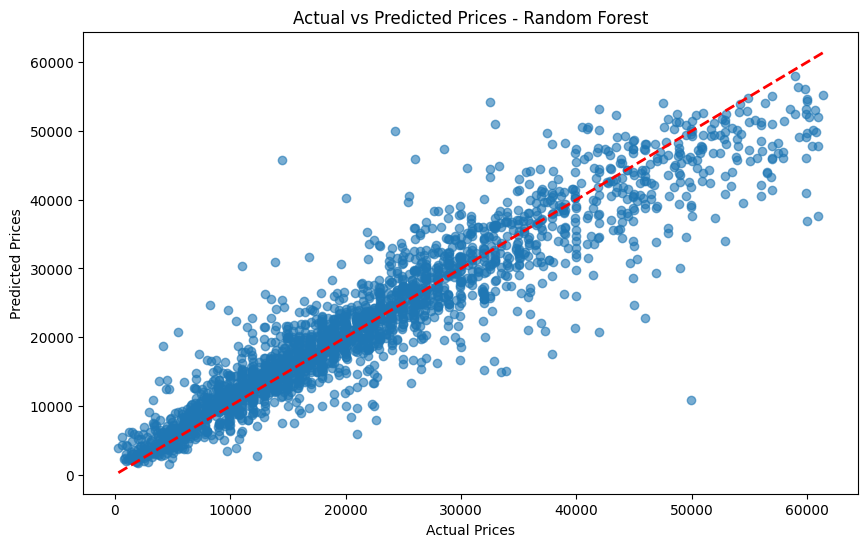

In [ ]:
# Step 8: Actual vs Predicted for Best Model
best_model_name = results_df.index[0]
best_model = results[best_model_name]['model']
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices - {best_model_name}')
plt.show()



Step 9: Feature Importance for Random Forest


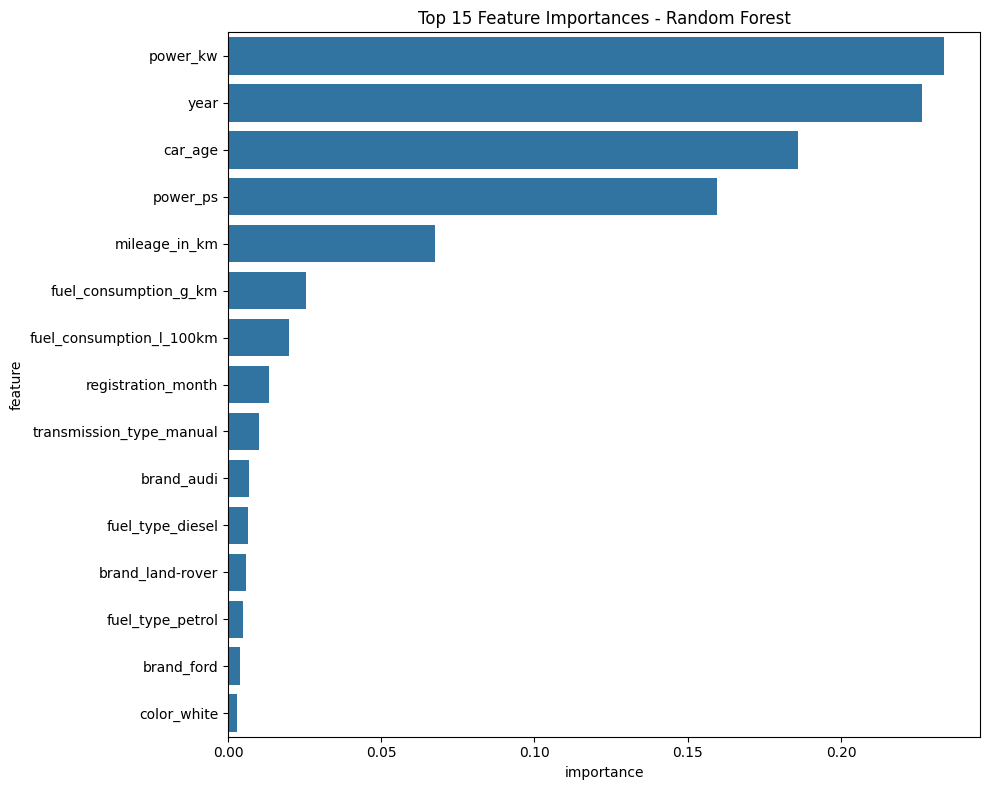

Top 10 most important features:
                     feature  importance
1                   power_kw    0.233686
0                       year    0.226449
7                    car_age    0.186120
2                   power_ps    0.159458
5              mileage_in_km    0.067569
4      fuel_consumption_g_km    0.025465
3   fuel_consumption_l_100km    0.019980
6         registration_month    0.013324
48  transmission_type_manual    0.010115
9                 brand_audi    0.006827


In [ ]:
# Step 9: Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    print(f"\nStep 9: Feature Importance for {best_model_name}")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot top 15 features
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print("Top 10 most important features:")
    print(feature_importance.head(10))


Step 10: Residual Analysis for Best Model


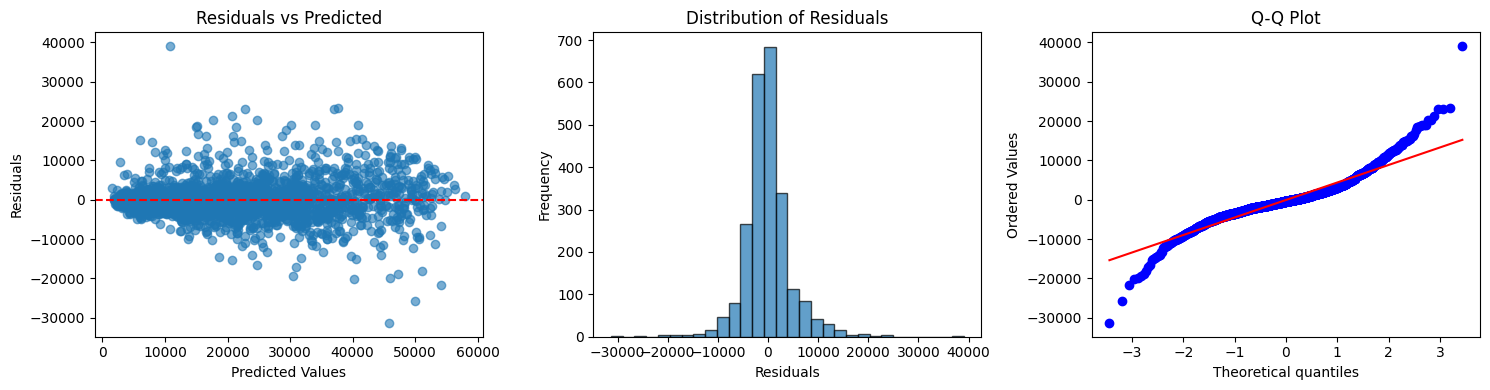

In [ ]:
# Step 10: Residual Analysis
print("\nStep 10: Residual Analysis for Best Model")
residuals = y_test - y_pred_best

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1, 3, 2)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()


In [ ]:
# Step 11: Final Summary
print("\n" + "="*50)
print("FINAL EVALUATION SUMMARY")
print("="*50)
print(f"Best Model: {best_model_name}")
print(f"Best R² Score: {results[best_model_name]['R2']:.4f}")
print(f"Best RMSE: {results[best_model_name]['RMSE']:.2f}")
print(f"Best MAE: {results[best_model_name]['MAE']:.2f}")

# Calculate baseline performance (predicting mean)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
print(f"Baseline RMSE (predicting mean): {baseline_rmse:.2f}")
print(f"Improvement over baseline: {((baseline_rmse - results[best_model_name]['RMSE']) / baseline_rmse * 100):.1f}%")

print("\nModel Performance Ranking:")
for i, (model_name, metrics) in enumerate(results.items(), 1):
    print(f"{i}. {model_name}: R² = {metrics['R2']:.4f}, RMSE = {metrics['RMSE']:.2f}")


FINAL EVALUATION SUMMARY
Best Model: Random Forest
Best R² Score: 0.8757
Best RMSE: 4660.56
Best MAE: 3125.37
Baseline RMSE (predicting mean): 13220.56
Improvement over baseline: 64.7%

Model Performance Ranking:
1. Linear Regression: R² = -490.6272, RMSE = 293127.94
2. Ridge Regression: R² = 0.7920, RMSE = 6029.12
3. Lasso Regression: R² = 0.8002, RMSE = 5908.74
4. Random Forest: R² = 0.8757, RMSE = 4660.56
5. Gradient Boosting: R² = 0.8638, RMSE = 4878.45
6. Support Vector Regression: R² = -0.0364, RMSE = 13458.79
